In [75]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

#### initialize empty lists

In [62]:
sites_list = []
namelist = []
induct_year = []
clean_induct_year = []

#### create sites_list dynamically

In [63]:
firstpage = "https://countrymusichalloffame.org/hall-of-fame/members/"
url_base = "https://countrymusichalloffame.org/hall-of-fame/members/page/" #no numbers here plz
startpage = 2
lastpage = 17 # make sure to go one more for python reasons!

sites_list.append(firstpage)

for i in range(startpage, lastpage):
    sites_list.append(url_base + str(i))

['https://countrymusichalloffame.org/hall-of-fame/members/', 'https://countrymusichalloffame.org/hall-of-fame/members/page/2', 'https://countrymusichalloffame.org/hall-of-fame/members/page/3', 'https://countrymusichalloffame.org/hall-of-fame/members/page/4', 'https://countrymusichalloffame.org/hall-of-fame/members/page/5', 'https://countrymusichalloffame.org/hall-of-fame/members/page/6', 'https://countrymusichalloffame.org/hall-of-fame/members/page/7', 'https://countrymusichalloffame.org/hall-of-fame/members/page/8', 'https://countrymusichalloffame.org/hall-of-fame/members/page/9', 'https://countrymusichalloffame.org/hall-of-fame/members/page/10', 'https://countrymusichalloffame.org/hall-of-fame/members/page/11', 'https://countrymusichalloffame.org/hall-of-fame/members/page/12', 'https://countrymusichalloffame.org/hall-of-fame/members/page/13', 'https://countrymusichalloffame.org/hall-of-fame/members/page/14', 'https://countrymusichalloffame.org/hall-of-fame/members/page/15', 'https://

#### loop through list

In [64]:
for site in sites_list:
    response = requests.get(site)
    soup = BeautifulSoup(response.content, 'lxml')
    # loop to get names
    for names in soup.find_all('h3'):
        namelist.append(names.get_text())
    # loop to get induction years
    my_regex = re.compile(r"Inducted")
    for year in soup.find_all(text = my_regex):
        induct_year.append(year)

In [65]:
#cleaning induct_year output
for el in induct_year:
    clean_induct_year.append(el[-22:-18])

### convert lists to df

In [67]:
country_df = pd.DataFrame()
country_df['names'] = namelist
country_df['Induction Year'] = clean_induct_year
country_df[-20:]

,names,Induction Year
120,Hank Thompson,1989
121,Mel Tillis,2007
122,Floyd Tillman,1984
123,Merle Travis,1977
124,Randy Travis,2016
125,Ernest Tubb,1965
126,Grant Turner,1981
127,Conway Twitty,1999
128,Porter Wagoner,2002
129,Cindy Walker,1997


### fixing datatypes of columns

In [74]:
data_types_dict = {'names': str, 'Induction Year': 'int64'}
country_df = country_df.astype(data_types_dict)
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   names           140 non-null    object
 1   Induction Year  140 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


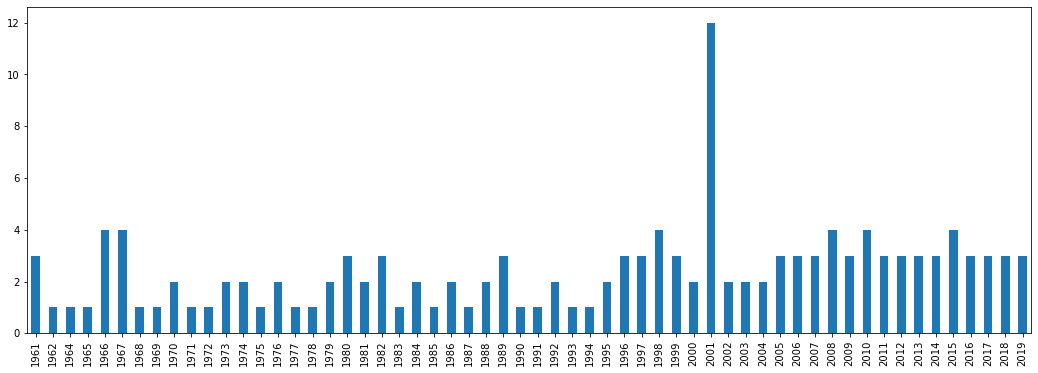

In [131]:
# country_df.value_counts("Induction Year") 
# country_df.sort_values("Induction Year")
# plt.bar(country_df["Induction Year"], country_df["Induction Year"].value_counts())

country_df['Induction Year'].value_counts().sort_index().plot(kind='bar', figsize=(18, 6));


In [140]:
#https://pythonbasics.org/pandas-iterate-dataframe/
for index, row in country_df.iterrows():
    print(type(index))
    print(index)
    print('~~~~~~')

    print(type(row))
    print(row)
    print('------')

<class 'int'>
0
~~~~~~
<class 'pandas.core.series.Series'>
names             Roy Acuff
Induction Year         1962
name_length             140
Name: 0, dtype: object
------
<class 'int'>
1
~~~~~~
<class 'pandas.core.series.Series'>
names             Alabama
Induction Year       2005
name_length           140
Name: 1, dtype: object
------
<class 'int'>
2
~~~~~~
<class 'pandas.core.series.Series'>
names             Bill Anderson
Induction Year             2001
name_length                 140
Name: 2, dtype: object
------
<class 'int'>
3
~~~~~~
<class 'pandas.core.series.Series'>
names             Eddy Arnold
Induction Year           1966
name_length               140
Name: 3, dtype: object
------
<class 'int'>
4
~~~~~~
<class 'pandas.core.series.Series'>
names             Chet Atkins
Induction Year           1973
name_length               140
Name: 4, dtype: object
------
<class 'int'>
5
~~~~~~
<class 'pandas.core.series.Series'>
names             Gene Autry
Induction Year          1969
